# **Pararius Rental Apartment Web Scraping**

Scrap all the appartments data from the Amtradam city 

[You Tube](https://www.youtube.com/watch?v=RvCBzhhydNk&t=805s)

[Pararius](https://www.pararius.com/apartments/amsterdam)

In [ ]:
!pip3 install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install beautifulsoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement beautifulsoup (from versions: 3.2.0, 3.2.1, 3.2.2)
ERROR: No matching distribution found for beautifulsoup


In [ ]:
!pip3 install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [ ]:
lis=np.arange(1,20)
print(lis,type(lis))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] <class 'numpy.ndarray'>


In [ ]:
title=[]
sub_title=[]
price=[]
features=[]
surface_area=[]
no_of_rooms=[]
agent=[]
interior=[]

In [ ]:
for i in lis:
    url='https://www.pararius.com/apartments/amsterdam/page-'+str(i)
    res=requests.get(url=url)
    soup= BeautifulSoup(res.content,'html.parser')
    soup.prettify()
    rows=soup.find_all('section',class_='listing-search-item')
    for row in rows:
        title.append(row.find('h2',class_='listing-search-item__title').text.replace("\n",'').strip())
#        label.append(row.find('div',class_='listing-search-item__label').text.replace("\n",'').strip())
        sub_title.append(row.find('div',class_='listing-search-item__sub-title').text.replace("\n",'').strip())
        price.append(row.find('div',class_='listing-search-item__price').text.replace("\n",'').strip())
        features.append(row.find('ul',class_='illustrated-features illustrated-features--compact').text.replace("\n",'').strip())
        surface_area.append(row.find('li',class_='illustrated-features__item illustrated-features__item--surface-area').text.replace("\n",'').strip())
        no_of_rooms.append(row.find('li',class_='illustrated-features__item illustrated-features__item--number-of-rooms').text.replace("\n",'').strip())
        agent.append(row.find('div',class_='listing-search-item__info').text.replace("\n",'').strip())


    

In [ ]:
df=pd.DataFrame({'Title':title,'Sub_title':sub_title,'Price':price,'Features':features,'Surface_area':surface_area,'No of rooms':no_of_rooms,'Agent':agent})
df

,Title,Sub_title,Price,Features,Surface_area,No of rooms,Agent
0,Apartment Veembroederhof 177,1019 HD Amsterdam (Oostelijk Havengebied),"€3,000 per month",146 m²3 roomsFurnished,146 m²,3 rooms,Van Huis Uit Makelaars
1,Apartment Rustenburgerstraat 146 A20,1073 GJ Amsterdam (Nieuwe Pijp),"€2,300 per month",55 m²3 roomsFurnished,55 m²,3 rooms,ViaDaan
2,Apartment Eerste Hugo de Grootstraat,1052 KK Amsterdam (Frederik Hendrikbuurt),"€2,300 per month",65 m²3 roomsFurnished,65 m²,3 rooms,PropertyManager Amsterdam
3,Apartment Schippersstraat,1011 AZ Amsterdam (Nieuwmarkt/Lastage),"€2,400 per month",115 m²4 roomsUpholstered,115 m²,4 rooms,V-Amsterdam
4,Apartment Wildenborch 75,1082 KC Amsterdam (Buitenveldert-West),"€3,250 per month",135 m²4 roomsUpholstered,135 m²,4 rooms,Amstelland Makelaars
...,...,...,...,...,...,...,...
603,House Keizersgracht 663,1017 DV Amsterdam (Grachtengordel-Zuid),"€2,300 per month",90 m²5 roomsBefore 1906,90 m²,5 rooms,Peter Bruin Makelaardij
604,Apartment Brouwersgracht 270 D,1013 HG Amsterdam (Haarlemmerbuurt),"€2,700 per month",85 m²3 roomsUpholstered,85 m²,3 rooms,House of Rentals
605,Apartment Bronckhorststraat 46,1071 WV Amsterdam (Museumkwartier),"€3,500 per month",104 m²4 roomsUpholstered,104 m²,4 rooms,Dutch Housing Centre BV
606,Apartment Prinsengracht 246 H,1016 HE Amsterdam (Jordaan),"€3,500 per month",131 m²4 rooms37 m²,131 m²,4 rooms,De la Haye Makelaardij O.G.


In [ ]:
df.to_excel(r"/content/drive/MyDrive/CSV Files/Pararius Rental Apartment Web Scraping.xls",header=True,index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


In [ ]:
df.to_excel(r"/content/drive/MyDrive/CSV Files/Pararius Rental Apartment Web Scraping.xlsx",header=True,index=False)

In [ ]:
df.to_csv(r"/content/drive/MyDrive/CSV Files/Pararius Rental Apartment Web Scraping.csv",header=True,index=False)

# **EDA Over the Pararius Rental Apartment DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/CSV Files/Pararius Rental Apartment Web Scraping.csv')
df1

,Title,Sub_title,Price in Euro per month,Features,Surface_area,No of rooms,Agent
0,Apartment Rustenburgerstraat 146 A20,1073 GJ Amsterdam (Nieuwe Pijp),2300,Furnished,55,3,ViaDaan
1,Apartment Herculesstraat,1076 SM Amsterdam (Stadionbuurt),2250,Furnished,65,3,Klok Real Estate
2,Apartment Willem Frederik Hermansstraat 69,1011 DG Amsterdam (Nieuwmarkt/Lastage),3750,Upholstered,122,4,Renthouse Vastgoed
3,Apartment Prinseneiland 50 2L,1013 LR Amsterdam (Haarlemmerbuurt),2700,Furnished,110,3,Renthouse Vastgoed
4,Apartment Marco Polostraat 263 3,1056 DM Amsterdam (Van Galenbuurt),1700,Upholstered or furnished,50,2,HousingNet
...,...,...,...,...,...,...,...
572,House Veenbesstraat 2,1036 LP Amsterdam (Tuindorp Oostzaan),2500,Upholstered,130,5,The Rental Agency Amsterdam
573,Apartment Haarlemmerweg 55 3,1051 KP Amsterdam (Staatsliedenbuurt),2250,Upholstered,69,4,Parker & Williams Real Estate Services
574,Apartment Plantage Kerklaan,1018 SX Amsterdam (Weesperbuurt/Plantage),2750,Furnished,90,3,Koops Makelaardij Amsterdam
575,Apartment Emmy Andriessestraat,1087 NE Amsterdam (IJburg Zuid),1784,²3 rooms2010,114,3,Van 't Hof Rijnland Vastgoedmanagement


In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    577 non-null    object
 1   Sub_title                577 non-null    object
 2   Price in Euro per month  577 non-null    int64 
 3   Features                 577 non-null    object
 4   Surface_area             577 non-null    int64 
 5   No of rooms              577 non-null    int64 
 6   Agent                    577 non-null    object
dtypes: int64(3), object(4)
memory usage: 31.7+ KB


In [ ]:
df1.describe()

,Price in Euro per month,Surface_area,No of rooms
count,577.000000,577.000000,577.000000
mean,2826.474870,98.951473,3.327556
std,1546.792656,50.894476,1.346995
min,655.000000,15.000000,1.000000
25%,1950.000000,64.000000,3.000000
50%,2450.000000,87.000000,3.000000
75%,3200.000000,120.000000,4.000000
max,14000.000000,536.000000,10.000000


In [ ]:
df1.isnull().sum()

Title                      0
Sub_title                  0
Price in Euro per month    0
Features                   0
Surface_area               0
No of rooms                0
Agent                      0
dtype: int64

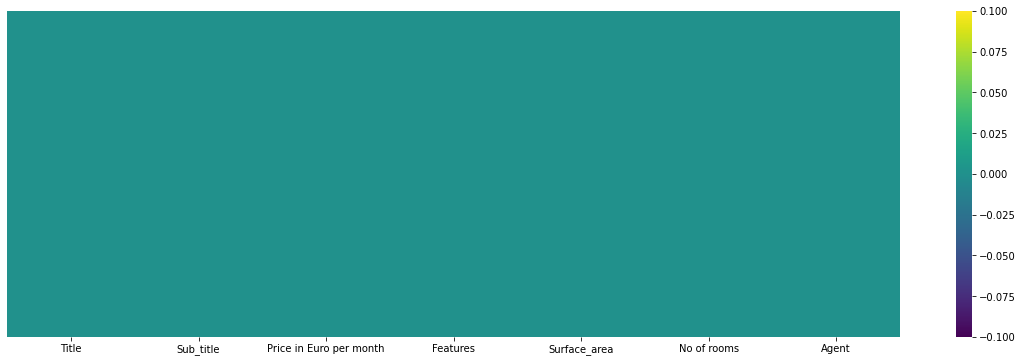

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Q 1. find out the what are the unique agents are there and how many

In [ ]:
df2=df1.groupby(['Agent'])['Price in Euro per month','Surface_area'].sum().reset_index().sort_values('Price in Euro per month',ascending=False,ignore_index=True)
a=df2.head(10)
a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Agent,Price in Euro per month,Surface_area
0,ViaDaan,72639,1917
1,Broersma Makelaardij,51775,1566
2,Amsterdam Housing,51150,2009
3,Parker & Williams Real Estate Services,46250,1572
4,Dutch Housing Centre BV,38900,1332
5,AmsterHomes,33495,876
6,Heeren Makelaars B.V.,30900,1010
7,Inter Immo Amsterdam,28700,1118
8,LIV Residential,26680,1217
9,Koops Makelaardij Amsterdam,26450,858


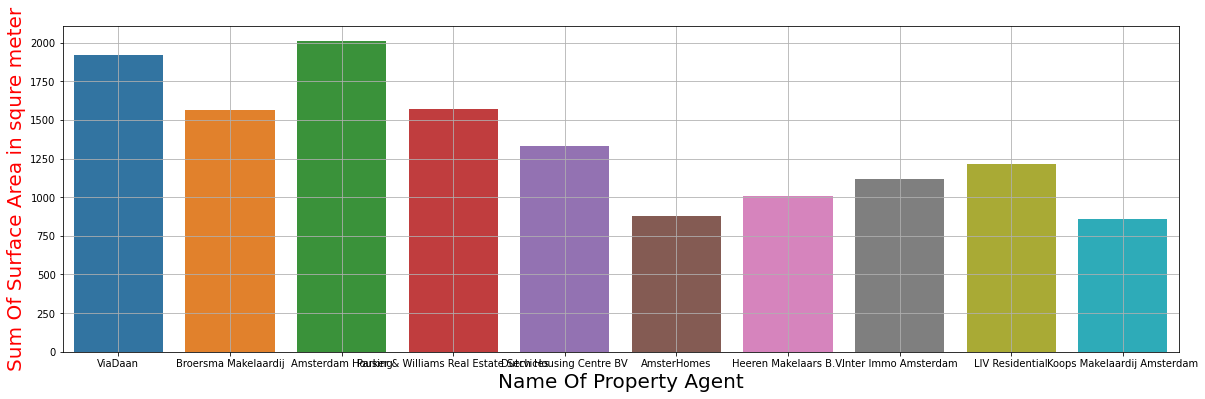

In [ ]:
matplotlib.rcParams['figure.figsize']=(20,6) 
sns.barplot(x='Agent',y='Surface_area',data=a)
plt.xlabel('Name Of Property Agent',size=20)
plt.ylabel('Sum Of Surface Area in squre meter' ,size=20,color='red')
plt.grid()
plt.show()

Ans : There are 187 unique agents in which we find out top 10 agents which is having high amount surface area.

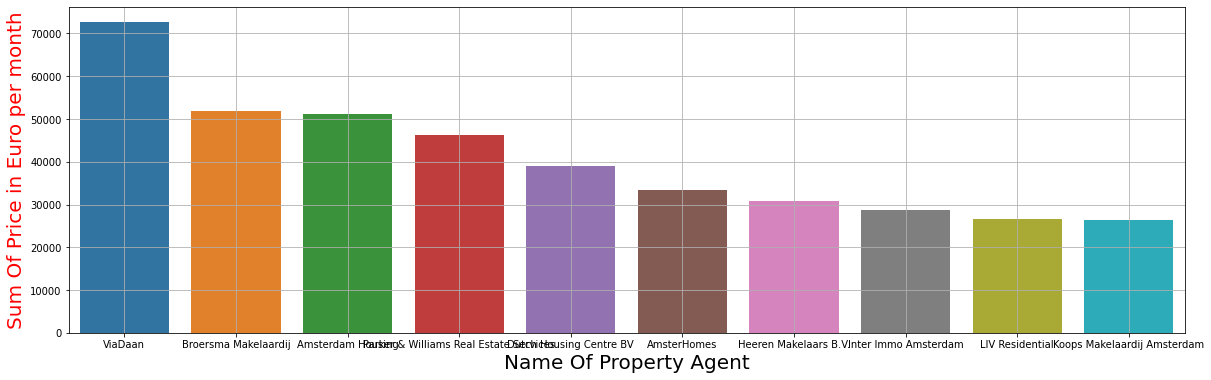

In [ ]:
matplotlib.rcParams['figure.figsize']=(20,6) 
sns.barplot(x='Agent',y='Price in Euro per month',data=a)
plt.xlabel('Name Of Property Agent',size=20)
plt.ylabel('Sum Of Price in Euro per month' ,size=20,color='red')
plt.grid()
plt.show()

Ans : There are 187 unique agents in which we find out top 10 agents which is having high cost of surface area.

To plot the scatter plot to find out relation between sum of Price per month and sum of surface area in squre meter.

In [ ]:
df3=df1.groupby(['Agent'])['Title'].count().reset_index().sort_values('Title',ascending=False,ignore_index=True)
df3.head()

,Agent,Title
0,ViaDaan,33
1,Amsterdam Housing,19
2,Parker & Williams Real Estate Services,15
3,LIV Residential,15
4,Expathousing.com (Amsterdam),11


Ans 🅰  : So we get Agents who having a maximum number Properties  from the Amstredam city

In [ ]:
agent=df3.Agent.value_counts().index
agent

Index(['ViaDaan', 'Vastgoed Verhuurmakelaardij', 'Surreal Estate',
       'Raadsheer Baart', 'Thoma Post Makelaars', 'Van Laar Vastgoed',
       'Sweers & Boys', 'Rotterdam Apartments', 'Recourt Makelaars',
       'Park Real Estate',
       ...
       'Amsterdam Beautiful Property Rental',
       'Visch & Van Zeggelaar Amsterdam',
       'Smit & Heinen Makelaars en Taxateurs', 'Hoen Vastgoedbeheer',
       'Renthouse Vastgoed', 'Eefje Voogd Makelaardij',
       'Keizerskroon makelaars', 'Huizenbalie.nl',
       'Aemestelle Makelaars Amsterdam', 'startupstays'],
      dtype='object', length=187)

In [ ]:
agent_values=df3.Title.values
agent_values

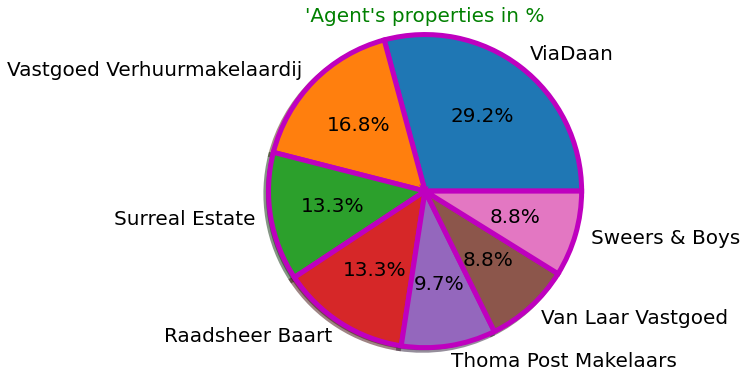

In [ ]:
from numpy.ma.core import size
plt.pie(x=agent_values[:7],labels=agent[:7],autopct='%0.1f%%',shadow=True,radius=1.2,textprops={"fontsize":20},wedgeprops={"linewidth":5,'edgecolor':'m'})
plt.title("'Agent's properties in %",size=20,color='green')
#plt.legend(loc=10)
plt.show()

conclusions :- 'ViaDaan' have maximum number of properties which about 29.2 percent

Q. 3 Find out the title or Properties which having and more surface area

In [ ]:
df4=df1.groupby(['Title'])['Price in Euro per month','Surface_area'].sum().reset_index().sort_values('Surface_area',ascending=False,ignore_index=True)
k=df4.head()
k

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Title,Price in Euro per month,Surface_area
0,Apartment Rustenburgerstraat 146 A20,46000,1100
1,Apartment Prinsengracht,20395,657
2,Apartment Keizersgracht,22150,640
3,Apartment Herengracht,17650,609
4,House Prinsengracht 516,13500,536


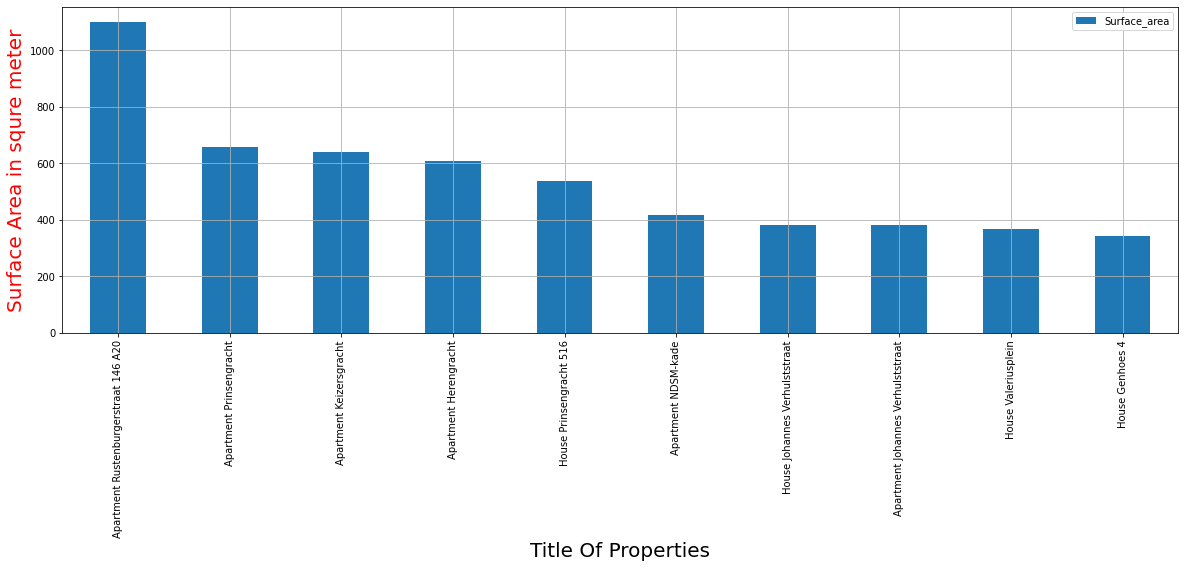

In [ ]:
df4.plot.bar(x='Title',y='Surface_area')
plt.grid()
plt.xlabel('Title Of Properties',size=20)
plt.ylabel('Surface Area in squre meter',size=20,color='red')
plt.show()

Ans : top 5 propertie swhich is having maximum surface Area (Squre meter)

Q.  Top 5 propertie swhich is having manimum surface Area (Squre meter)

In [ ]:
l=df4.tail(10)
l

,Title,Price in Euro per month,Surface_area
483,Studio Ferdinand Bolstraat,1800,40
484,Apartment Tollensstraat 63 C,1550,40
485,Apartment Jacob van Lennepstraat 64 2B,1750,40
486,Apartment Papaverweg,1395,40
487,Apartment Palmgracht 59,1150,40
488,Studio Schaarsbergenstraat 39,1200,34
489,Studio August Allebéplein,673,30
490,Studio Elizabeth Cady Stantonplein,655,30
491,Studio Nieuwezijds Voorburgwal,925,26
492,Room Langswater,700,15


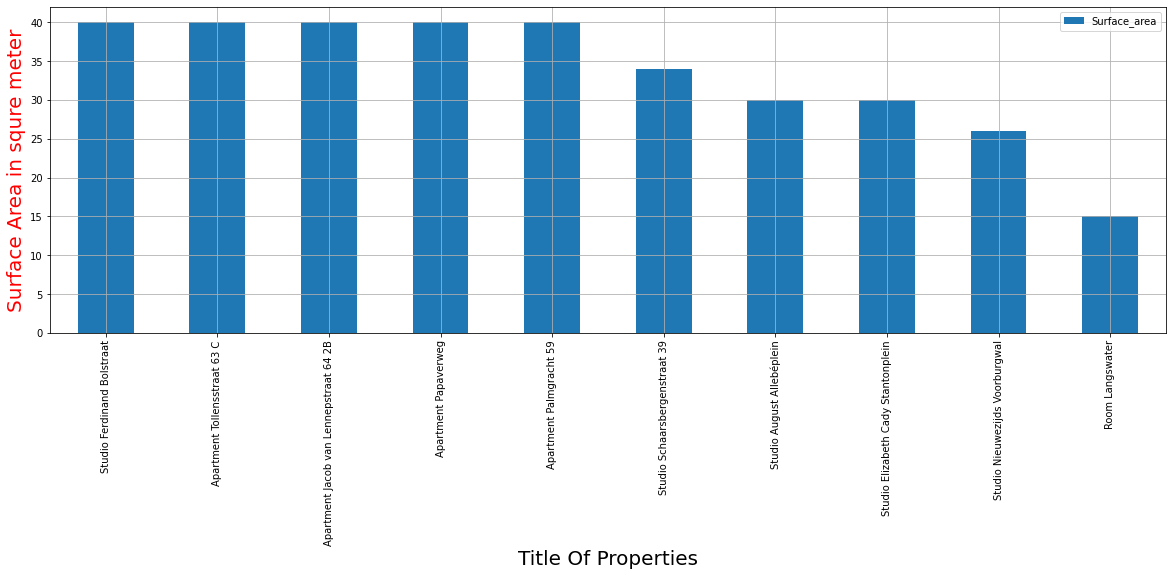

In [ ]:
l.plot.bar(x='Title',y='Surface_area')
plt.grid()
plt.xlabel('Title Of Properties',size=20)
plt.ylabel('Surface Area in squre meter',size=20,color='red')
plt.show()

Ans : top 5 propertie swhich is having minimum surface Area (Squre meter)

 Q. 4 Find out how many Properties and agent which is having available rooms are more than 3.

In [ ]:
df5=df1[df1['No of rooms']>3]
m=df5.groupby(['No of rooms'])['Title','Agent'].count().reset_index()
m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,No of rooms,Title,Agent
0,4,108,108
1,5,39,39
2,6,22,22
3,7,11,11
4,8,1,1
5,9,3,3
6,10,3,3


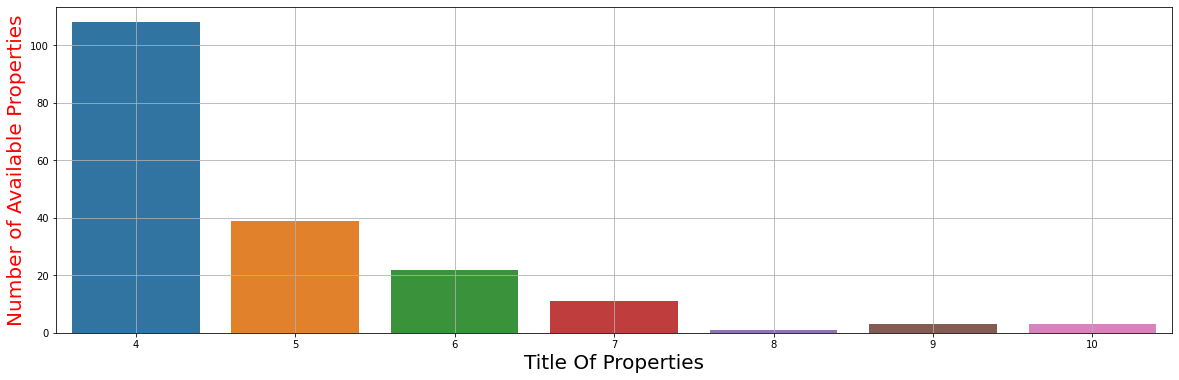

In [ ]:
matplotlib.rcParams['figure.figsize']=(20,6) 
sns.barplot(x='No of rooms',y='Title',data=m)
plt.xlabel('Title Of Properties',size=20)
plt.ylabel('Number of Available Properties',size=20,color='red')
plt.grid()
plt.show()

Ans  : -    From above table we can analyse that as no of rooms increases the quantity of properties are drastically decreases.

From above graph we can see that there is only one property having a 8 rooms

Q. 5  Find out Properties and agent which is having avilable rooms are more than 3 in descending Order and their Properties Title.

In [ ]:
df5=df1[df1['No of rooms']>3].sort_values('No of rooms',ascending=False,ignore_index=True)
df5

,Title,Sub_title,Price in Euro per month,Features,Surface_area,No of rooms,Agent
0,House Johannes Verhulststraat,1071 MX Amsterdam (Museumkwartier),13500,²,383,10,Heeren Makelaars B.V.
1,House Johannes Verhulststraat 151 H,1075 GW Amsterdam (Willemspark),11000,Upholstered,255,10,Hoen Vastgoedbeheer
2,House Moestuinlaan,1036 KD Amsterdam (Tuindorp Oostzaan),4500,Upholstered or furnished,200,10,Von Poll Real Estate - Centrum
3,Apartment Vierwindenstraat,1013 LA Amsterdam (Haarlemmerbuurt),7500,Furnished,236,9,Peters & Partners
4,Apartment Johannes Verhulststraat,1075 HB Amsterdam (Willemspark),5850,Upholstered,245,9,Hausing
...,...,...,...,...,...,...,...
182,Apartment Saxenburgerstraat,1054 KM Amsterdam (Overtoomse Sluis),3500,Furnished,116,4,Inter Immo Amsterdam
183,Apartment Maarten Jansz. Kosterstraat,1017 VZ Amsterdam (De Weteringschans),2950,Furnished,115,4,Housing Experts
184,Apartment Bella Vistastraat,1096 GM Amsterdam (Omval/Overamstel),3250,Furnished,116,4,Expat Rentals Amsterdam
185,Apartment Hendrik Jacobszstraat,1075 PD Amsterdam (Willemspark),2850,Upholstered,112,4,BrinkBorgh Makelaardij


Ans :-  There are 3 maximum 10 rooms apartments are availabal

Q.  6  Find out details of top five apartments whichis having maximum surface area (meter squre) and maximum rooms are availabal

In [ ]:
df6=df1.sort_values(by=['Surface_area','No of rooms'],ascending=[False,False],ignore_index=True)
df6

,Title,Sub_title,Price in Euro per month,Features,Surface_area,No of rooms,Agent
0,House Prinsengracht 516,1017 KJ Amsterdam (De Weteringschans),13500,Upholstered,536,5,Vastgoed Unie Makelaardij
1,House Johannes Verhulststraat,1071 MX Amsterdam (Museumkwartier),13500,²,383,10,Heeren Makelaars B.V.
2,House Valeriusplein,1075 BJ Amsterdam (Willemspark),8000,Upholstered,366,6,Inter Immo Amsterdam
3,House Genhoes 4,1082 BC Amsterdam (Buitenveldert-West),14000,Upholstered,342,8,Broersma Makelaardij
4,Apartment Keizersgracht,1017 EM Amsterdam (Grachtengordel-Zuid),10750,Furnished,320,7,Von Poll Real Estate - Zuidas
...,...,...,...,...,...,...,...
572,Studio Schaarsbergenstraat 39,1107 JS Amsterdam (Holendrecht/Reigersbos),1200,Furnished,34,1,ViaDaan
573,Studio August Allebéplein,1062 AC Amsterdam (Overtoomse Veld),673,Upholstered,30,1,Change=
574,Studio Elizabeth Cady Stantonplein,"1102 BL Amsterdam (Bijlmer Centrum (D,F,H))",655,Upholstered,30,1,Change=
575,Studio Nieuwezijds Voorburgwal,1012 RK Amsterdam (Burgwallen-Nieuwe Zijde),925,Upholstered or furnished,26,1,Central Rentals B.V.
